In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))
import nbimporter


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from preprocessing.feature_engineering import Preprocessor

In [ ]:
df = pd.read_csv('../data/mall_customers.csv')
preprocessor = Preprocessor(df)
Preprocessed_df = preprocessor.transform()

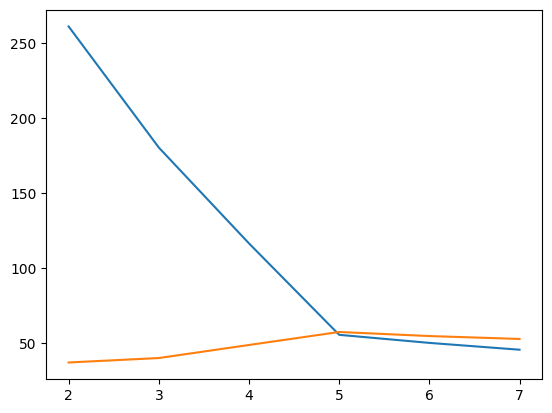

In [5]:
inertia = []
s_score = []
for k in range(2, 8):
    kmean_model = KMeans(n_clusters = k)
    predict = kmean_model.fit_predict(Preprocessed_df)
    inertia.append(kmean_model.inertia_)
    s_score.append( silhouette_score(Preprocessed_df, predict)*100 )

plt.plot(np.arange(2,8), inertia, '-')
plt.plot(np.arange(2,8), s_score, '-');

According to chart kmean model work best with 5 clusters

In [7]:
kmean_model = KMeans(n_clusters = 5, init='k-means++', random_state=0)
kmean_predict = kmean_model.fit_predict(Preprocessed_df)
silhouette_score(Preprocessed_df, kmean_predict)

0.5725152970949826

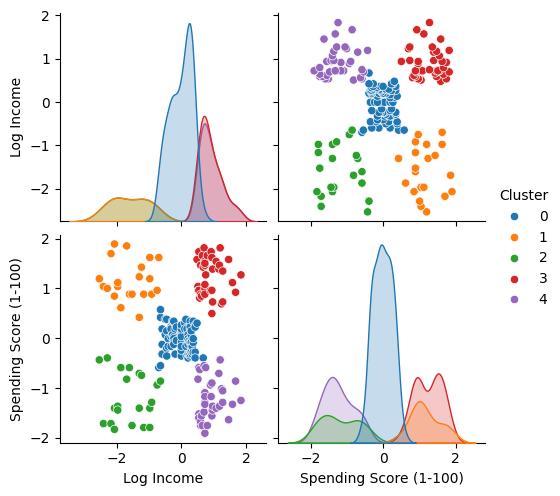

In [9]:
Preprocessed_df['Cluster'] = kmean_predict
sns.pairplot(Preprocessed_df, hue="Cluster", palette="tab10")